DEEP LEARNING LAB 3

---

*Aditi Desai*

*200968126*

Q) Train, Test and plot the performance curvesfor the followingarchitecturesoverthe MNIST datasetas well as the CIFAR-10 dataset.

In [1]:
import tensorflow as tf
import keras
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

# Mnist Dataset

###Metadata:

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

###EDA and PrePorcessing:

In [21]:
mnist=tf.keras.datasets.mnist

In [22]:
(x_train_full, y_train_full) , (x_test_full, y_test_full)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


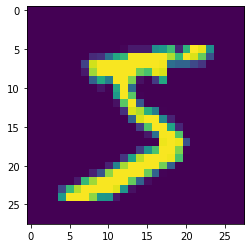

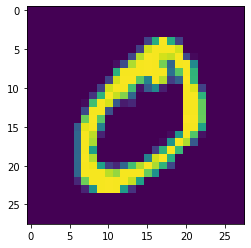

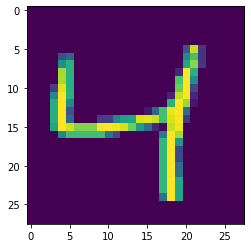

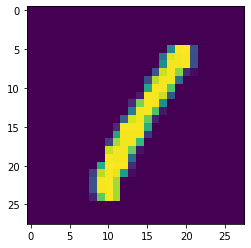

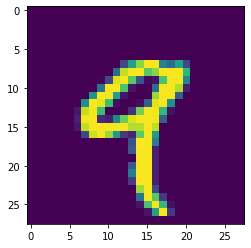

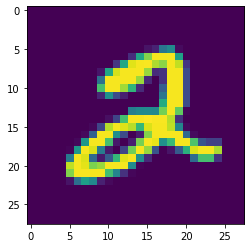

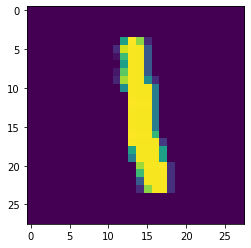

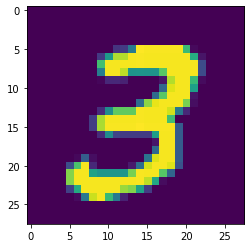

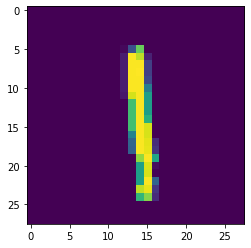

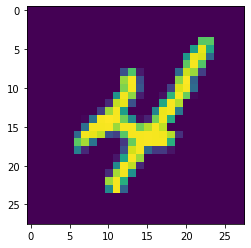

In [23]:
for i in np.unique(y_train_full):
     plt.imshow(x_train_full[i])
     plt.show()

In [24]:
np.unique(y_train_full)
#classification output class

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
np.shape(x_train_full), np.shape(y_train_full)

((60000, 28, 28), (60000,))

In [26]:
np.shape(x_test_full), np.shape(y_test_full)

((10000, 28, 28), (10000,))

training data: 60000 instances GRAY SCALE

testing data: 10000 instances GRAY SCALE

Dimensions:

x: 28x28

y:1x1 

In [27]:
#normalization
x_train_full=x_train_full/255.0
x_test_full=x_test_full/255.0

###Model Building

**CNN Model:1**

a) One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0

b)One Pooling layerwhich uses MAXPOOLINGwith stride =2.

c) One hidden layer having number of neurons = 100

Note: use ReLUactivation function after each convolution layer.

In [28]:
model1=tf.keras.Sequential()
 
model1.add(tf.keras.Input(shape=[28,28,1], name="InputLayer"))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5),activation="relu", padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model1.add(tf.keras.layers.Flatten()) 
model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")) 
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
________________________________________________

*Note:*

padding:
valid- zero padding
.same- feature map size=input size

pool_size: 2x2 stride 2

In [29]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size=32
epochs=30

history1 = model1.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1466 - accuracy: 0.9556 - val_loss: 0.0516 - val_accuracy: 0.9875
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0540 - val_accuracy: 0.9848
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.0393 - val_accuracy: 0.9898
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0473 - val_accuracy: 0.9880
Epoch 5/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0497 - val_accuracy: 0.9880
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0414 - val_accuracy: 0.9905
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0572 - val_accuracy:

In [ ]:
model1.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9905


[0.10693665593862534, 0.9904999732971191]

**CNN  Model:2**

a) Two back-to-backConvolution layerswhich uses 32 kernels each of size 3x3, stride = 1 and, padding =0

b)One Pooling layer which uses MAXPOOLING with stride =2.

c) One hidden layer having number of neurons = 100

Note: use ReLU activation function after each convolution layer.

In [ ]:
model2=tf.keras.Sequential()
 
model2.add(tf.keras.Input(shape=[28,28,1], name="InputLayer"))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu", padding="valid"))
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu", padding="valid"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model2.add(tf.keras.layers.Flatten()) 
model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")) 
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 4608)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size=32
epochs=30

history2 = model2.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.1068 - val_accuracy: 0.9900
Epoch 2/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0839 - val_accuracy: 0.9918
Epoch 3/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0884 - val_accuracy: 0.9903
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0750 - val_accuracy: 0.9915
Epoch 5/30
1688/1688 [==============================] - 6s 3ms/step - loss: 8.4143e-04 - accuracy: 0.9998 - val_loss: 0.0988 - val_accuracy: 0.9907
Epoch 6/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1090 - val_accuracy: 0.9902
Epoch 7/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0971 - val_accur

In [ ]:
model2.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 0.1557 - accuracy: 0.9904


[0.1557183414697647, 0.9904000163078308]

**LeNet-5 architecture:**

input image=28x28 -> Filter 5x5 S=1 K=6 P=2, activation=tanh -> Feature map1=28x28 -> MaxPooling 2x2 K=6 P=0 -> Feature map2= 14x14 -> Filter 5x5 S=1 K=16 P=0, activation=tanh -> Feature map3=10x10 -> MaxPooling 2x2 K=16 P=0 -> Feature map4= 5x5

Feature map4 -> Flatten -> 400 input nodes    *5x5x16*

400 -> Hidden Layer1 -Dense(120 nodes)

120 -> Hidden Layer2 -Dense(84 nodes)

84 -> (sigmoid) Output Layer -Dense(10 nodes)

In [ ]:
model3=tf.keras.Sequential()
 
model3.add(tf.keras.Input(shape=[28,28,1], name="InputLayer"))
model3.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5),activation="tanh", padding="same"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model3.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5),activation="tanh", padding="valid"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model3.add(tf.keras.layers.Flatten()) 
model3.add(tf.keras.layers.Dense(120, activation="relu", name="HiddenLayer1"))
model3.add(tf.keras.layers.Dense(84, activation="relu", name="HiddenLayer2"))
model3.add(tf.keras.layers.Dense(10, activation="sigmoid", name="OutputLayer")) 
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)              

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size=32
epochs=30

history3 = model3.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1884 - accuracy: 0.9429 - val_loss: 0.0670 - val_accuracy: 0.9798
Epoch 2/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0601 - accuracy: 0.9810 - val_loss: 0.0423 - val_accuracy: 0.9877
Epoch 3/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0486 - val_accuracy: 0.9868
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0469 - val_accuracy: 0.9875
Epoch 5/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 6/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 7/30
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0434 - val_accuracy:

In [ ]:
model3.evaluate(x_test_full, y_test_full)

313/313 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9868


[0.08714214712381363, 0.9868000149726868]

# CIFAR-10 Dataset

###Metadata:



The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

								
Label	Description

0	airplane

1	automobile

2	bird

3	cat

4	deer

5	dog

6	frog

7	horse

8	ship

9	truck

###EDA and PreProcessing:

In [2]:
cifar=tf.keras.datasets.cifar10

In [3]:
(x1_train_full, y1_train_full) , (x1_test_full, y1_test_full)= cifar.load_data()

170508288/170498071 [==============================] - 14s 0us/step


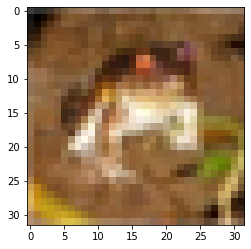

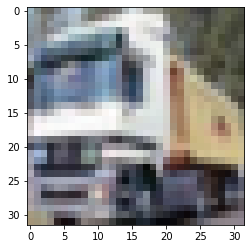

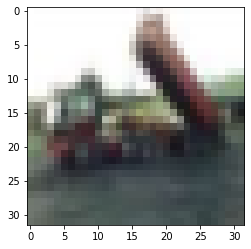

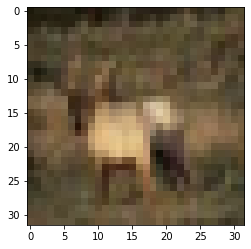

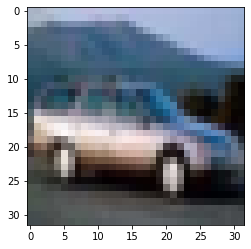

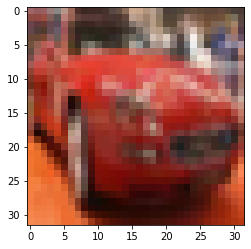

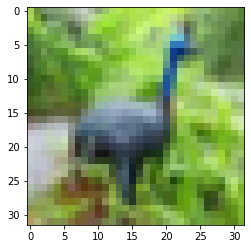

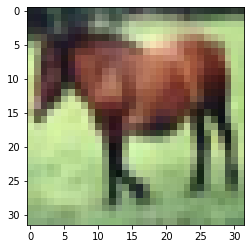

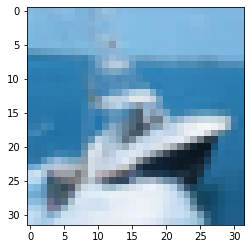

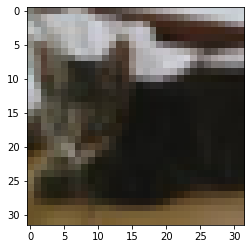

In [ ]:
for i in np.unique(y1_train_full):
  plt.imshow(x1_train_full[i])
  plt.show()

In [4]:
np.unique(y1_train_full)
#classification output class

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
np.shape(x1_train_full), np.shape(y1_train_full)

((50000, 32, 32, 3), (50000, 1))

In [6]:
np.shape(x1_test_full), np.shape(y1_test_full)

((10000, 32, 32, 3), (10000, 1))

training data: 50000 instances RGB

testing data: 10000 instances RGB

Dimensions:

x: 32x32

y:1x1 

In [7]:
#normalization
x1_train_full=x1_train_full/255.0
x1_test_full=x1_test_full/255.0

###Model Building:

**CNN Model:1**

In [8]:
model4=tf.keras.Sequential()
 
model4.add(tf.keras.Input(shape=[32,32,3], name="InputLayer"))
model4.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5),activation="relu", padding="valid"))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model4.add(tf.keras.layers.Flatten()) 
model4.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model4.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")) 
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
__________________________________________________

In [9]:
model4.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size=64
epochs=10

history4 = model4.fit(x1_train_full, y1_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
704/704 [==============================] - 14s 4ms/step - loss: 1.5811 - accuracy: 0.4334 - val_loss: 1.3496 - val_accuracy: 0.5240
Epoch 2/10
704/704 [==============================] - 3s 4ms/step - loss: 1.2820 - accuracy: 0.5473 - val_loss: 1.3690 - val_accuracy: 0.5034
Epoch 3/10
704/704 [==============================] - 3s 4ms/step - loss: 1.1726 - accuracy: 0.5872 - val_loss: 1.2055 - val_accuracy: 0.5812
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 1.0810 - accuracy: 0.6191 - val_loss: 1.1369 - val_accuracy: 0.6098
Epoch 5/10
704/704 [==============================] - 3s 4ms/step - loss: 1.0018 - accuracy: 0.6474 - val_loss: 1.1390 - val_accuracy: 0.6004
Epoch 6/10
704/704 [==============================] - 3s 4ms/step - loss: 0.9405 - accuracy: 0.6704 - val_loss: 1.0452 - val_accuracy: 0.6432
Epoch 7/10
704/704 [==============================] - 3s 4ms/step - loss: 0.8805 - accuracy: 0.6943 - val_loss: 1.0494 - val_accuracy: 0.6420
Epoch

In [10]:
model4.evaluate(x1_test_full, y1_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 1.1174 - accuracy: 0.6289


[1.117423415184021, 0.6288999915122986]

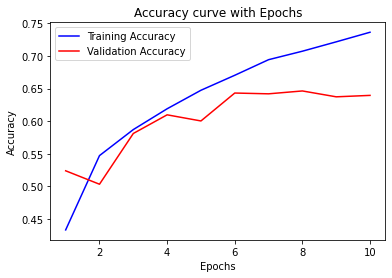

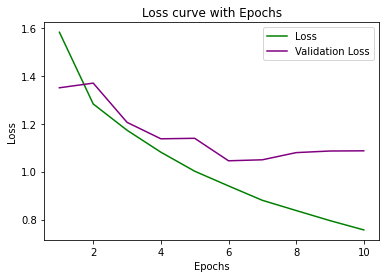

In [12]:
cifar10acc = history4.history["accuracy"]
cifar10val_acc = history4.history["val_accuracy"]
cifar10lss = history4.history["loss"]
cifar10val_lss = history4.history["val_loss"]
epochs_list = [1,2,3,4,5,6,7,8,9,10]

plt.plot(epochs_list, cifar10acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, cifar10val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, cifar10lss, 'green', label="Loss")
plt.plot(epochs_list, cifar10val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

**CNN  Model:2**


In [13]:
model5=tf.keras.Sequential()
  
model5.add(tf.keras.Input(shape=[32,32,3], name="InputLayer"))
model5.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu", padding="valid"))
model5.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3),activation="relu", padding="valid"))
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model5.add(tf.keras.layers.Flatten()) 
model5.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer1"))
model5.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")) 
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

In [14]:
model5.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size=64
epochs=10

history5 = model5.fit(x1_train_full, y1_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
704/704 [==============================] - 4s 5ms/step - loss: 1.4906 - accuracy: 0.4665 - val_loss: 1.2208 - val_accuracy: 0.5684
Epoch 2/10
704/704 [==============================] - 5s 7ms/step - loss: 1.1267 - accuracy: 0.6024 - val_loss: 1.1752 - val_accuracy: 0.5920
Epoch 3/10
704/704 [==============================] - 5s 7ms/step - loss: 0.9663 - accuracy: 0.6606 - val_loss: 0.9944 - val_accuracy: 0.6562
Epoch 4/10
704/704 [==============================] - 4s 5ms/step - loss: 0.8580 - accuracy: 0.7017 - val_loss: 0.9751 - val_accuracy: 0.6634
Epoch 5/10
704/704 [==============================] - 3s 5ms/step - loss: 0.7606 - accuracy: 0.7337 - val_loss: 0.9643 - val_accuracy: 0.6694
Epoch 6/10
704/704 [==============================] - 4s 5ms/step - loss: 0.6742 - accuracy: 0.7643 - val_loss: 0.9872 - val_accuracy: 0.6682
Epoch 7/10
704/704 [==============================] - 3s 5ms/step - loss: 0.5950 - accuracy: 0.7914 - val_loss: 1.0016 - val_accuracy: 0.6730
Epoch 

In [15]:
model5.evaluate(x1_test_full, y1_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 1.2881 - accuracy: 0.6505


[1.28814697265625, 0.6504999995231628]

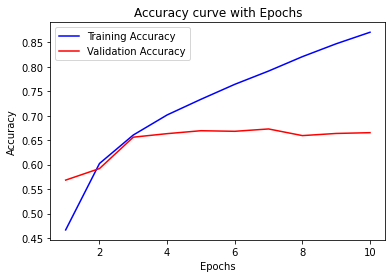

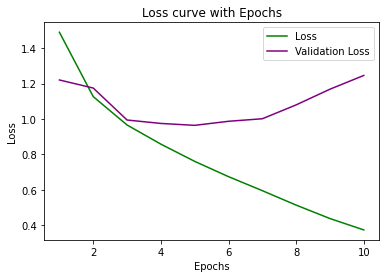

In [16]:
cifar10acc = history5.history["accuracy"]
cifar10val_acc = history5.history["val_accuracy"]
cifar10lss = history5.history["loss"]
cifar10val_lss = history5.history["val_loss"]
epochs_list = [1,2,3,4,5,6,7,8,9,10]

plt.plot(epochs_list, cifar10acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, cifar10val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, cifar10lss, 'green', label="Loss")
plt.plot(epochs_list, cifar10val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

**LeNet-5 architecture:**

input image=32x32 -> Filter 5x5 S=1 K=6 P=2, activation=tanh -> Feature map1=28x28 -> MaxPooling 2x2 K=6 P=0 -> Feature map2= 14x14 -> Filter 5x5 S=1 K=16 P=0, activation=tanh -> Feature map3=10x10 -> MaxPooling 2x2 K=16 P=0 -> Feature map4= 5x5

Feature map4 -> Flatten -> 400 input nodes    *5x5x16*

400 -> Hidden Layer1 -Dense(120 nodes)

120 -> Hidden Layer2 -Dense(84 nodes)

84 -> (sigmoid) Output Layer -Dense(10 nodes)

In [17]:
model6=tf.keras.Sequential()
 
model6.add(tf.keras.Input(shape=[32,32,3], name="InputLayer"))
model6.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5),activation="tanh", padding="valid"))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model6.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5),activation="tanh", padding="valid"))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model6.add(tf.keras.layers.Flatten()) 
model6.add(tf.keras.layers.Dense(120, activation="relu", name="HiddenLayer1"))
model6.add(tf.keras.layers.Dense(84, activation="relu", name="HiddenLayer2"))
model6.add(tf.keras.layers.Dense(10, activation="sigmoid", name="OutputLayer")) 
model6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)              

In [18]:
model6.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size=64
epochs=10

history6 = model6.fit(x1_train_full, y1_train_full, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
704/704 [==============================] - 4s 4ms/step - loss: 1.6399 - accuracy: 0.4047 - val_loss: 1.4582 - val_accuracy: 0.4782
Epoch 2/10
704/704 [==============================] - 3s 5ms/step - loss: 1.3166 - accuracy: 0.5254 - val_loss: 1.3103 - val_accuracy: 0.5348
Epoch 3/10
704/704 [==============================] - 5s 6ms/step - loss: 1.1771 - accuracy: 0.5805 - val_loss: 1.2107 - val_accuracy: 0.5698
Epoch 4/10
704/704 [==============================] - 5s 7ms/step - loss: 1.0906 - accuracy: 0.6120 - val_loss: 1.1643 - val_accuracy: 0.5902
Epoch 5/10
704/704 [==============================] - 3s 4ms/step - loss: 1.0197 - accuracy: 0.6390 - val_loss: 1.1517 - val_accuracy: 0.6000
Epoch 6/10
704/704 [==============================] - 3s 4ms/step - loss: 0.9660 - accuracy: 0.6580 - val_loss: 1.0790 - val_accuracy: 0.6216
Epoch 7/10
704/704 [==============================] - 3s 4ms/step - loss: 0.9121 - accuracy: 0.6774 - val_loss: 1.0989 - val_accuracy: 0.6120
Epoch 

In [19]:
model6.evaluate(x1_test_full, y1_test_full)

313/313 [==============================] - 1s 3ms/step - loss: 1.1158 - accuracy: 0.6264


[1.1157599687576294, 0.6263999938964844]

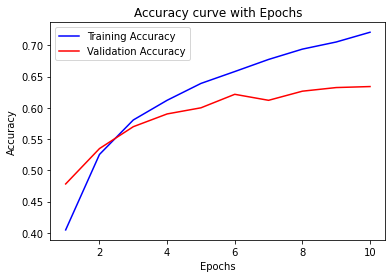

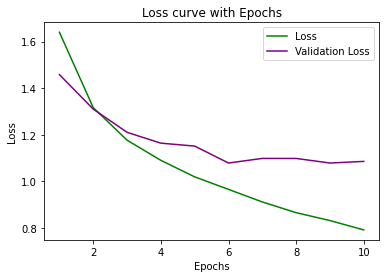

In [20]:
# Plotting and Visualising

lenet5cifar10acc = history6.history["accuracy"]
lenet5cifar10val_acc = history6.history["val_accuracy"]
lenet5cifar10lss = history6.history["loss"]
lenet5cifar10val_lss = history6.history["val_loss"]
epochs_list = [1,2,3,4,5,6,7,8,9,10]
#Accuracy Plot
plt.plot(epochs_list, lenet5cifar10acc, 'blue', label='Training Accuracy')
plt.plot(epochs_list, lenet5cifar10val_acc, 'red', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy curve with Epochs')
plt.legend()
plt.show()

#Loss PLot
plt.plot(epochs_list, lenet5cifar10lss, 'green', label="Loss")
plt.plot(epochs_list, lenet5cifar10val_lss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

# Inference : Test Accuracy

## Mnist Dataset:

CNN Model 1(best): loss: 0.1069 - accuracy: 0.9905

CNN Model 2: loss: 0.1557 - accuracy: 0.9904

LeNet Model: loss: 0.0871 - accuracy: 0.9868

## Cifar-10 Dataset:

CNN Model 1: loss: 1.1174 - accuracy: 0.6289

CNN Model 2(best): loss: 1.2881 - accuracy: 0.6505

LeNet Model: loss: 1.1158 - accuracy: 0.6264



---

